In [ ]:
## This file runs MDS on various dissimilarity matrices and visualizes the result
## five main parts of this file:
## 1) defining the functions: normalize_data, mds_embeddings, get_cmap, display_b_results, and display_ap_results
## 2) BUILDING TO BUILDING
##         - get results of MDS on each variation of dissimilarity matrix:
##          - visualize the results on a set of buildings (this test set can be changed to random indices or any building names from the building_names.csv)
## 3) ACCESS POINT TO ACCESS POINT (these results failed, but code included to see how would be done)
## 4) TEST only using a subset of ACCESS POINT TO ACCESS POINT 
## 5) TEST only using a subset of BUILDING TO BUILDING

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import random

In [250]:
# function to return normalized data
def normalize_data(m):
    n = np.shape(m)[0]
    
    temp = m.flatten()
    temp = temp[temp != 0] # zeros are missing data not actually zeros
    mu = np.mean(temp)
    sigma = np.std(temp)
    
    # normalize data
    X = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if m[i][j] != 0:
                X[i][j] = (m[i][j] - mu)/sigma
    
    # return result
    return X

In [516]:
# function to train model and return embeddings
def mds_embeddings(x):
    seed = np.random.RandomState(seed=3)
    mds = MDS(n_components=3, metric=False, max_iter=300, eps=1e-12, dissimilarity="precomputed", random_state=seed)
    pos = mds.fit_transform(x)
    return pos

In [252]:
# function to get array of colors of given length
def get_cmap(n):
    return plt.cm.get_cmap('hsv', n)

In [253]:
# function to scatter plot positions
# results: array of 2d arrays containing x,y coordinates for buildings
# labels: name for each embeddings
# buildings: list of the buildings that want to plot
# results and labels must be same length
def display_b_results(results, labels, buildings):
    n = len(buildings)

    # get enough colors
    colors = get_cmap(n)
    
    # set up for plots
    fig, ax = plt.subplots()
    
    # add each set in different color
    for i in range(n):
        index = labels.index(buildings[i])
        x = results[index][0]
        y = results[index][1]
        ax.scatter(x, y, color=colors(i), label=buildings[i])
        ax.annotate(buildings[i], (x, y))
        
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [254]:
# function to scatter plot positions
# results: array of 2d arrays containing x,y coordinates for access points 
# labels: building name labels for each ap that there ia an embedding for
# buildings: list of the buildings that want to plot all associated access points
# results and labels must be same length
def display_ap_results(results, labels, buildings):
    n = len(buildings)
    
    # get enough colors
    colors = get_cmap(n)
    c = ['b', 'g', 'r']
    
    # set up for plots
    fig, ax = plt.subplots()
    
    # build set for each building interested in
    for i in range(n):
        current_set = []
        for j in range(len(labels)):
            if labels[j] == buildings[i]:
                current_set.append([results[j][0], results[j][1]])
                
        # plot
        x = np.stack(current_set)[:,0]
        y = np.stack(current_set)[:,1]
        ax.scatter(x, y, color=c[i], label=buildings[i])
        
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:
###########################
# display building results
###########################

In [14]:
# import building labels
ds_mat_labels_b = []
with open('ds_mat_labels_b.csv', 'r') as f:
    for line in f.readlines():
        l = line.strip()
        ds_mat_labels_b.append(l)

In [160]:
# Dissimilarity Matrix B_avg:

# import
ds_mat_b_avg = np.genfromtxt('ds_mat_b_avg.csv', delimiter=',')

n = np.shape(ds_mat_b_avg)[0]

# normalize
x = normalize_data(ds_mat_b_avg)

# train
embeddings_b_avg = mds_embeddings(x)

In [162]:
# Dissimilarity Matrix B_avg scaled:

# import
ds_mat_b_avg_scaled = np.genfromtxt('ds_mat_b_avg_scaled.csv', delimiter=',')

n = np.shape(ds_mat_b_avg)[0]

# normalize
x = normalize_data(ds_mat_b_avg_scaled)

# train
embeddings_b_avg_scaled = mds_embeddings(x)

In [164]:
# Dissimilarity Matrix B_min:

# import
ds_mat_b_min = np.genfromtxt('ds_mat_b_min.csv', delimiter=',')

n = np.shape(ds_mat_b_min)[0]

# normalize
x = normalize_data(ds_mat_b_min)

# train
embeddings_b_min = mds_embeddings(x)

In [166]:
# Dissimilarity Matrix B_avg scaled:

# import
ds_mat_b_min_scaled = np.genfromtxt('ds_mat_b_min_scaled.csv', delimiter=',')

n = np.shape(ds_mat_b_min_scaled)[0]

# normalize
x = normalize_data(ds_mat_b_min_scaled)

# train
embeddings_b_min_scaled = mds_embeddings(x)

In [ ]:
# example test set: can use any names from buildings names 
#test_buildings = ['lizwaters', 'kronshage', 'sellery', 'memun', 'ecb', 'carsong', 'mecheng', 
#                  '333ecm', 'hcwhite', 'histsoc',
#                  'bascom', 'vanvlek', 'ingraham', 'socsci']

In [ ]:
test_buildings = ['kronshage', 'sullivan', 'colehall', 'bradhall', 'phillips',
                  'nielsen', 'pharm',
                  'bascom', 'ingraham', 'socsci', 'north', 'south',
                  'sellery', 'witte', 'elvehjem', 'chazen', 'fluno',
                  'ecb', 'mecheng', 'shell', 'enghall', 'erb',
                  'memun', 'hcwhite', 'histsoc', 'alumctr']

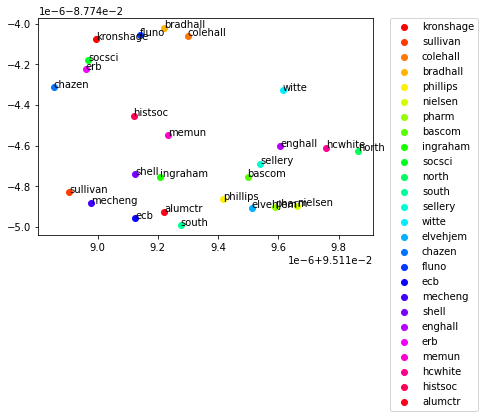

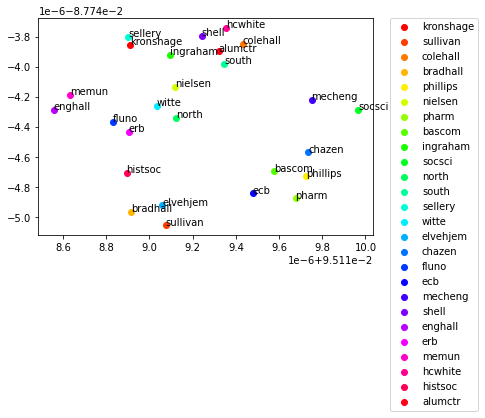

In [169]:
display_b_results(embeddings_b_avg, ds_mat_labels_b, test_buildings)

# display
display_b_results(embeddings_b_avg_scaled, ds_mat_labels_b, test_buildings)

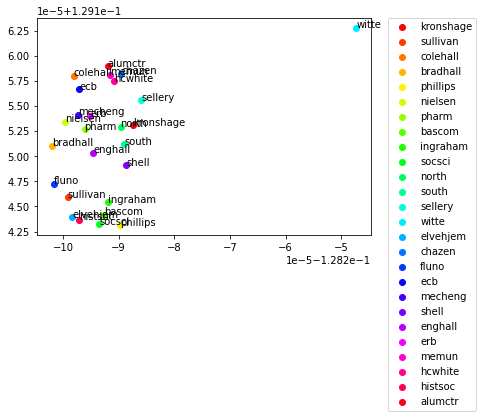

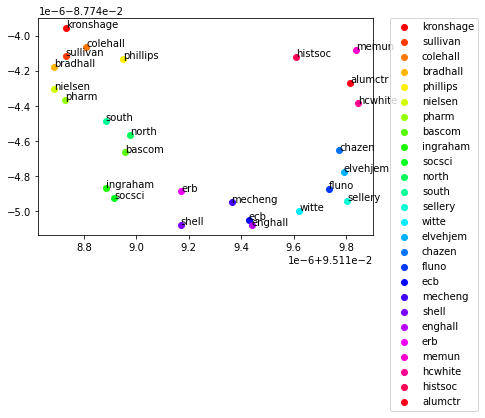

In [168]:
# display
display_b_results(embeddings_b_min, ds_mat_labels_b, test_buildings)

# display
display_b_results(embeddings_b_min_scaled, ds_mat_labels_b, test_buildings)

In [ ]:
###########################
# ACCESS POINT to ACCESS POINT Results
# These were not successful, including the code for reference 
# can see how these would be trained and visualized
###########################

In [172]:
# import access point labels
ds_mat_labels_ap = []
with open('ds_mat_labels_ap.csv', 'r') as f:
    for line in f.readlines():
        l = line.strip()
        ds_mat_labels_ap.append(l)

In [ ]:
# Dissimilarity Matrix ap_avg:

# import
ds_mat_ap_avg = np.genfromtxt('ds_mat_ap_avg.csv', delimiter=',')

# normalize
x = normalize_data(ds_mat_ap_avg)

# train
embeddings_ap_avg = mds_embeddings(x)

In [ ]:
# Dissimilarity Matrix ap_avg scaled:

# import
ds_mat_ap_avg_scaled = np.genfromtxt('ds_mat_ap_avg_scaled.csv', delimiter=',')

# normalize
x = normalize_data(ds_mat_ap_avg_scaled)

# train
embeddings_ap_avg_scaled = mds_embeddings(x)

In [ ]:
# Dissimilarity Matrix ap_min:

# import
ds_mat_ap_min = np.genfromtxt('ds_mat_ap_min.csv', delimiter=',')

# normalize
x = normalize_data(ds_mat_ap_min)

# train
embeddings_ap_min = mds_embeddings(x)

In [ ]:
# Dissimilarity Matrix ap_min scaled:

# import
ds_mat_ap_min_scaled = np.genfromtxt('ds_mat_ap_min_scaled.csv', delimiter=',')

# normalize
x = normalize_data(ds_mat_ap_min_scaled)

# train
embeddings_ap_min_scaled = mds_embeddings(x)

In [ ]:
# display
display_ap_results(embeddings_ap_avg, ds_mat_labels_ap, test_buildings)

display_ap_results(embeddings_ap_avg_scaled, ds_mat_labels_ap, test_buildings)

In [ ]:
# display
display_ap_results(embeddings_ap_min, ds_mat_labels_ap, test_buildings)

In [ ]:
######################################################
# ACCESS POINT to ACCESS POINT SUBSET TEST
######################################################

In [ ]:
# import access point labels
ds_mat_ap_subset_labels = []
with open('ds_mat_ap_subset_labels.csv', 'r') as f:
    for line in f.readlines():
        l = line.strip()
        ds_mat_ap_subset_labels.append(l)

In [ ]:
# Dissimilarity Matrix ap_min scaled:

# import
ds_mat_ap_min_scaled_subset = np.genfromtxt('ds_mat_ap_min_scaled_subset.csv', delimiter=',')

# normalize
x = normalize_data(ds_mat_ap_min_scaled_subset)

# train
embeddings_ap_min_scaled_subset = mds_embeddings(x)

In [ ]:
buildings = []
for i in range(len(ds_mat_ap_subset_labels)):
    if ds_mat_ap_subset_labels[i] not in buildings:
        buildings.append(ds_mat_ap_subset_labels[i])

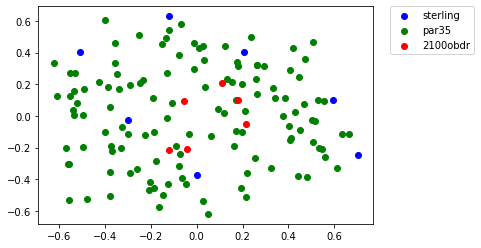

In [223]:
# display some
rnd = random.sample(range(0,len(buildings)-1), 3)
test1 = []
for i in range(len(rnd)):
    test1.append(buildings[rnd[i]])
display_ap_results(embeddings_ap_min_scaled_subset, ds_mat_ap_subset_labels, test1)

In [ ]:
# import access point labels
ds_mat_ap_subset_labels = []
with open('ds_mat_ap_subset2_labels.csv', 'r') as f:
    for line in f.readlines():
        l = line.strip()
        ds_mat_ap_subset_labels.append(l)

In [231]:
# import
ds_mat_ap_min_scaled_subset2 = np.genfromtxt('ds_mat_ap_min_scaled_subset2.csv', delimiter=',')

# normalize
x = normalize_data(ds_mat_ap_min_scaled_subset2)

# train
embeddings_ap_min_scaled_subset2 = mds_embeddings(x)
#embeddings_ap_min_scaled_subset2 = mds_embeddings(ds_mat_ap_min_scaled_subset2)

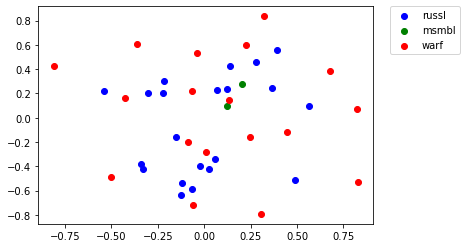

In [237]:
# display some
rnd = random.sample(range(0,len(buildings)-1), 3)
test1 = []
for i in range(len(rnd)):
    test1.append(buildings[rnd[i]])
display_ap_results(embeddings_ap_min_scaled_subset2, ds_mat_ap_subset_labels, test1)

In [ ]:
######################################################
# BUILDING to BUILDING SUBSET TEST
######################################################

In [466]:
# import building subset labels
ds_mat_b_subset_labels = []
with open('ds_mat_b_subset.csv', 'r') as f:
    for line in f.readlines():
        l = line.strip()
        ds_mat_b_subset_labels.append(l)

In [467]:
buildings = []
for i in range(len(ds_mat_b_subset_labels)):
    if ds_mat_b_subset_labels[i] not in buildings:
        buildings.append(ds_mat_b_subset_labels[i])
print(buildings)
print(len(buildings))

['1220cc', '1410jd', '1433m', '1800ua', '1910lin', '1930m', '206bc', '2100obdr', '2115h', '30nmills', '333ecm', '3817mp', '502hrik', '565sd', '585sd', '780reg', 'agbul', 'ageng', 'agengl', 'aghall', 'ahbs', 'aldoleo', 'alumctr', 'babcock', 'barnard', 'bascom', 'biochem', 'biochema', 'biotron', 'birge', 'bradhall', 'bradley', 'carsong', 'ccrl', 'chadhall', 'chambhs', 'chanchs', 'chartrhc', 'chazen', 'chem', 'chmbrln', 'colehall', 'cooper', 'csc', 'cssc', 'dairybn', 'dairyfrg', 'dcsb', 'dcsmith', 'ecb', 'edbldg', 'edsci', 'ehcom', 'elvehjem', 'enghall', 'erb', 'extension', 'fleet', 'fluno', 'fpm', 'fpmanex', 'genbio', 'genetics', 'gilman', 'gnight', 'grangr', 'grwal', 'hamel', 'harlow', 'hcwhite', 'hiram', 'hirama', 'histsoc', 'hslc', 'human', 'humanec', 'humph', 'ingraham', 'jones', 'jorns', 'king', 'kronshage', 'lakeshore', 'law', 'limnol', 'lizwater', 'lizwaters', 'llsilo', 'lowell', 'mack', 'mcardle', 'mecheng', 'meikl', 'memlib', 'memun', 'merit', 'mfcob', 'midmedlib', 'moore', 'msa

In [508]:
# import
ds_mat_b_min_scaled_subset = np.genfromtxt('ds_mat_b_min_subset.csv', delimiter=',')


# train
#embeddings_ap_min_scaled_subset2 = mds_embeddings(x)
embeddings_b_min_subset = mds_embeddings(ds_mat_b_min_scaled_subset)

In [517]:
# import
ds_mat_b_avg_subset = np.genfromtxt('ds_mat_b_avg_subset.csv', delimiter=',')

# normalize
x = normalize_data(ds_mat_b_avg_subset)

# train
#embeddings_ap_min_scaled_subset2 = mds_embeddings(x)
embeddings_b_avg_subset = mds_embeddings(x)

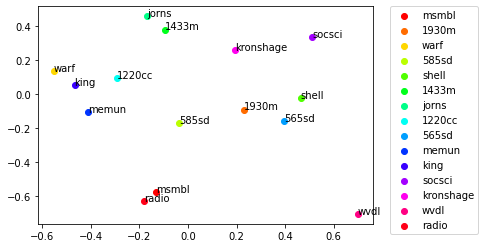

In [519]:
# display some
rnd = random.sample(range(0,len(buildings)-1), 15)
test1 = []
for i in range(len(rnd)):
    test1.append(buildings[rnd[i]])
    
display_b_results(embeddings_b_min_subset, ds_mat_b_subset_labels, test1)

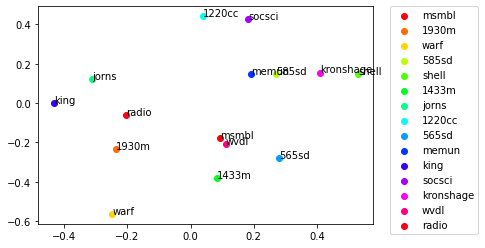

In [520]:
display_b_results(embeddings_b_avg_subset, ds_mat_b_subset_labels, test1)

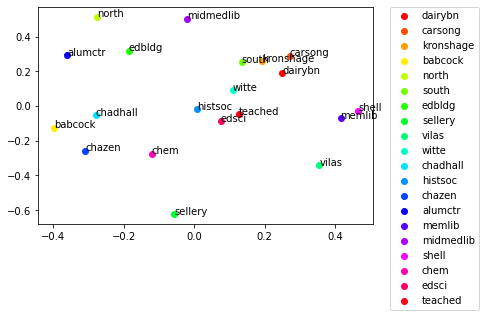

In [521]:
test_buildings = ['dairybn', 'carsong', 'kronshage', 'babcock',
                  'north', 'south', 'edbldg',
                  'sellery', 'vilas', 'witte', 'chadhall',
                  'histsoc', 'chazen',
                  'alumctr', 'memlib', 'midmedlib',
                  'shell',
                 'chem', 'edsci', 'teached']

display_b_results(embeddings_b_min_subset, ds_mat_b_subset_labels, test_buildings)

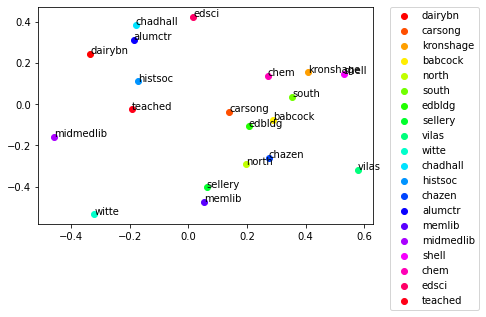

In [522]:
display_b_results(embeddings_b_avg_subset, ds_mat_b_subset_labels, test_buildings)

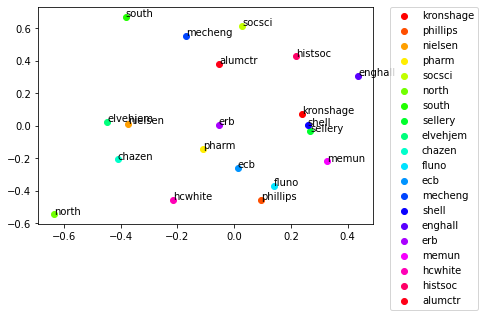

In [471]:
test_buildings = ['kronshage', 'phillips',
                  'nielsen', 'pharm',
                  'socsci', 'north', 'south',
                  'sellery', 'elvehjem', 'chazen', 'fluno',
                  'ecb', 'mecheng', 'shell', 'enghall', 'erb',
                  'memun', 'hcwhite', 'histsoc', 'alumctr']

display_b_results(embeddings_b_subset, ds_mat_b_subset_labels, test_buildings)